In [74]:

import sys
!{sys.executable} -m pip install nltk --quiet
!{sys.executable} -m pip install wordcloud --quiet
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [75]:
df = pd.read_csv('MENTAL HEALTH.csv')
print(df.head())

C:\Users\91938\AppData\Local\Temp\ipykernel_7784\3527673268.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MENTAL HEALTH.csv')


                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit Unnamed: 3  \
0  I have struggled with social anxiety from chil...   Anxiety        NaN   
1  Back in March (I know, a while ago D:), I woke...   Anxiety        NaN   
2  I've been withdrawing from medicines lately (e...   Anxiety        NaN   
3  First time poster, long time lurker. \n\nI've ...   Anxiety        NaN   
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN   

In [76]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'U

In [77]:
print("SHAPE BEFORE CLEANING: ", df.shape)

SHAPE BEFORE CLEANING:  (488738, 79)


In [78]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  
0  I have struggled with social anxiety from chil...   Anxiety  
1  Back in March (I know, a while ago D:), I woke...   Anxiety  
2  I've been withdrawing from medicines lately (e...   Anxiety  
3  First time poster, long time lurker. \n\nI've ...   Anxiety  
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety  


In [79]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit'], dtype='object')


In [80]:
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488738, 3)


In [81]:
df['Combined'] = df['Title'].fillna('') + ' ' + df['Text'].fillna('')

In [82]:
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [83]:
df['Combined'] = df['Combined'].str.lower()
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [84]:
df['Combined'] = df['Combined'].str.replace(r'[^a-z\s]', '', regex=True)
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [85]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [87]:
print("Lemmatized Text Samples: \n")
for i in range(5):
    print(f"Post #{i + 1}: ")
    print(df['Combined'].iloc[i])
    print("-" * 80)

Lemmatized Text Samples: 

Post #1: 
exposure work struggled social anxiety childhood main advice friend selfhelp book professional expose environment im better example get anxious every single time go shop even though shopping daily weekly since get nervous sweaty heart pounding every time go gym yet working gym year exposure worked anyone else
--------------------------------------------------------------------------------
Post #2: 
panic attack derealization cant go doctor advice appreciated back march know ago woke day go school feeling kind felt depressed didnt really feel like getting even seeing anyone history p really mainly happens winter time get highly anxious also going anywhere period time get suspicious paranoid everyone anything usually end isolating room eat way less also get highly irritable emotional like one time mom sent store milk started cry store thought going killed watched believe period watched government something higher power im gerbil study something like t

In [88]:
df = df[df['Combined'].str.len() > 10]  # adjust threshold as needed

In [89]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title         5
Text         21
Subreddit    59
Combined      0
dtype: int64

In [90]:
df[df.isnull().any(axis=1)]

,Title,Text,Subreddit,Combined
51758,"I Popped My Psych-Ward Cherry, Part II (Length...","Original Post \(possibly required reading, bu...",NaN,popped psychward cherry part ii lengthy amp vu...
51775,I’m maybe a society 6 but apparently a psych\-...,NaN,NaN,im maybe society apparently psychward
51777,"To Possibly Be Continued…""",Anxiety,NaN,possibly continued anxiety
88313,I am not asking for diagnosis.Just want to get...,Note: If you found your comments here is becau...,NaN,asking diagnosisjust want get rid doubt misdia...
88321,Things I read on this subreddit and i relate to:,NaN,NaN,thing read subreddit relate
...,...,...,...,...
480617,Title: Keratitis caused by a rare fungus,Malassezia restricta \(NCBI; US National Libr...,NaN,title keratitis caused rare fungus malassezia ...
480621,Title: Identification of Fungal Species in Bra...,NaN,NaN,title identification fungal specie brain tissu...
480625,§ “About 36 per cent of people with Alzheimer'...,study suggests; ScienceDaily; 2017\).,NaN,per cent people alzheimers thought delusion pe...
480627,Title: Schizophrenia as a prostaglandin defici...,NaN,NaN,title schizophrenia prostaglandin deficiency d...


In [91]:
df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_7784\724578079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)


In [92]:
df.reset_index(drop=True, inplace=True)

In [93]:
df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
df['Combined'] = df['Combined'].str.replace('\n', ' ', regex=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_7784\3396328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_7784\3396328298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_7784\3396328298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [94]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title        0
Text         0
Subreddit    0
Combined     0
dtype: int64

In [95]:
from IPython.display import display
display(df)


,Title,Text,Subreddit,Combined
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,exposure work struggled social anxiety childho...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,panic attack derealization cant go doctor advi...
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,long panic attack last ive withdrawing medicin...
3,Stepping stones,"First time poster, long time lurker. I've ha...",Anxiety,stepping stone first time poster long time lur...
4,"Coping with anxiety over climate change, on th...","Hi all, I made a throwaway account as my main...",Anxiety,coping anxiety climate change verge considerin...
...,...,...,...,...
488365,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,religion paranoid conversation ok ive got rant...
488366,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,isnt little weird tardive dyskinesia wake rare...
488367,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,symptom schizophrenia something else im sure s...
488368,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,anyone seen new black mirror episode bandersna...


C:\Users\91938\AppData\Local\Temp\ipykernel_7784\2076999871.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


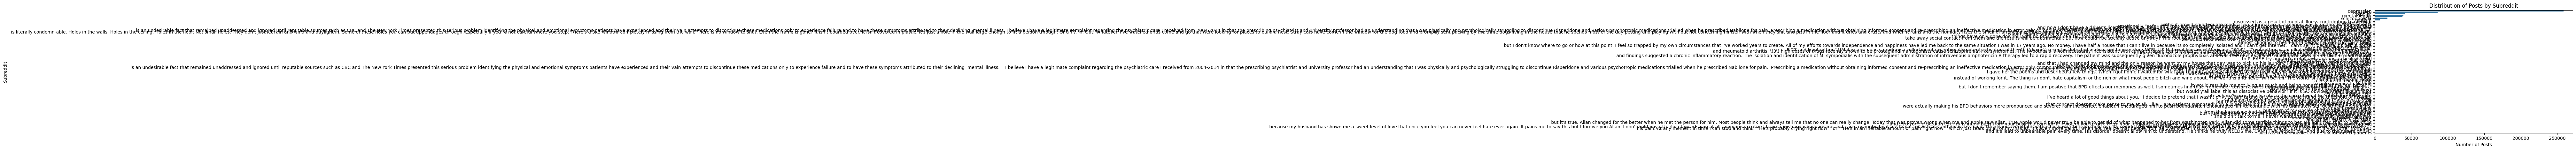

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

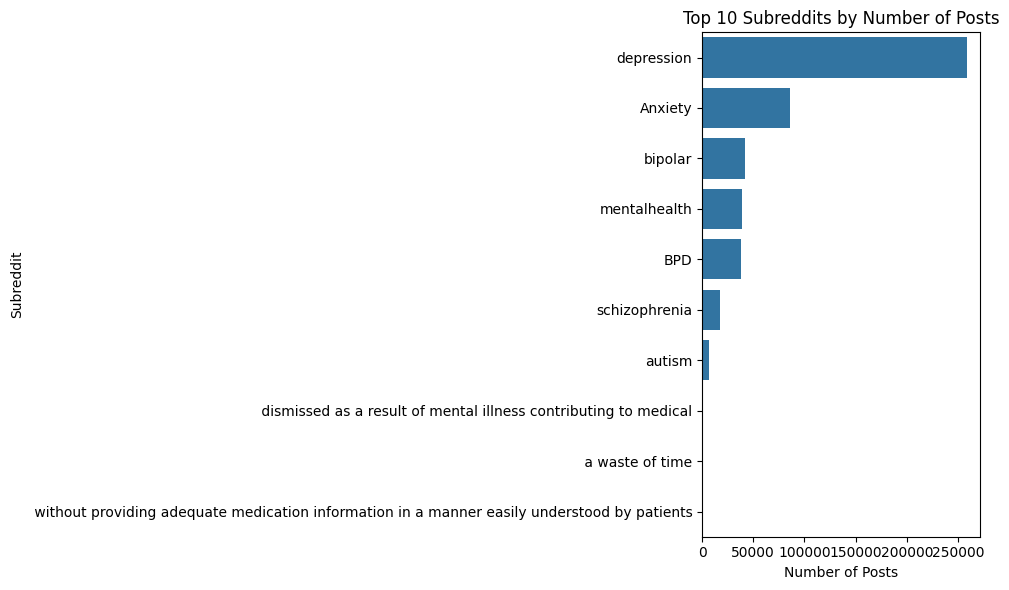

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 subreddits by frequency
top_subreddits = df['Subreddit'].value_counts().nlargest(10).index

# Filter DataFrame
filtered_df = df[df['Subreddit'].isin(top_subreddits)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=top_subreddits)
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()


In [98]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Replace all other subreddit values with NaN
df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))

# Drop rows where 'subreddit' is NaN (i.e., invalid or unwanted subreddits)
df.dropna(subset=['Subreddit'], inplace=True)
df.isnull().values.any()

C:\Users\91938\AppData\Local\Temp\ipykernel_7784\901992291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))
C:\Users\91938\AppData\Local\Temp\ipykernel_7784\901992291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Subreddit'], inplace=True)


False

In [99]:
df.reset_index(drop=True, inplace=True)
df.shape

(488290, 4)

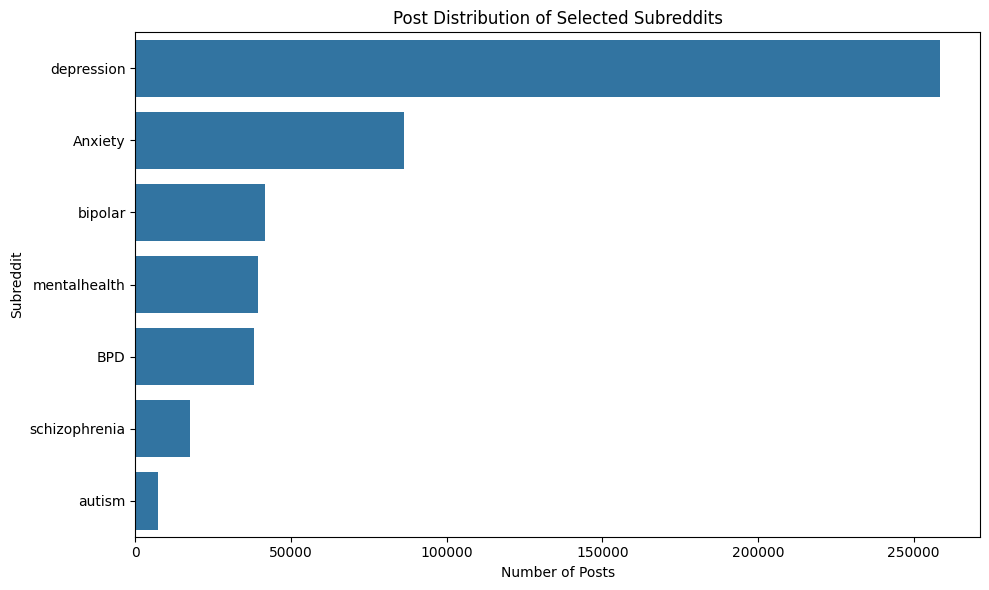

In [100]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Keep only rows where 'Subreddit' is in the valid list
filtered_df = df[df['Subreddit'].isin(valid_subreddits)].copy()

# Plot distribution of the selected subreddits
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=filtered_df['Subreddit'].value_counts().index)
plt.title('Post Distribution of Selected Subreddits')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [102]:
def simple_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

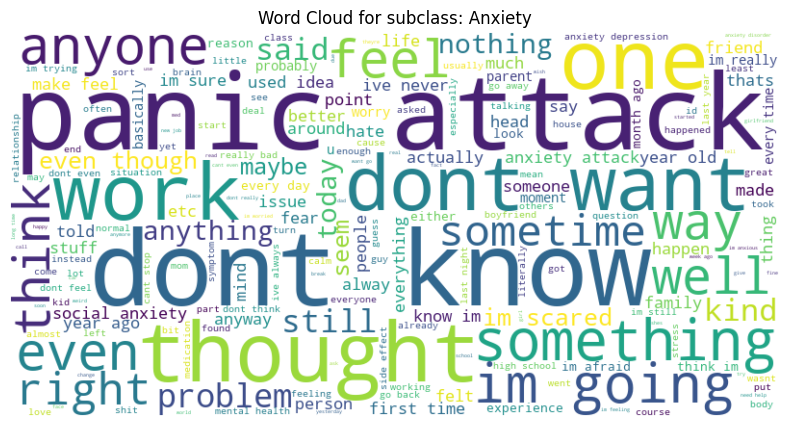

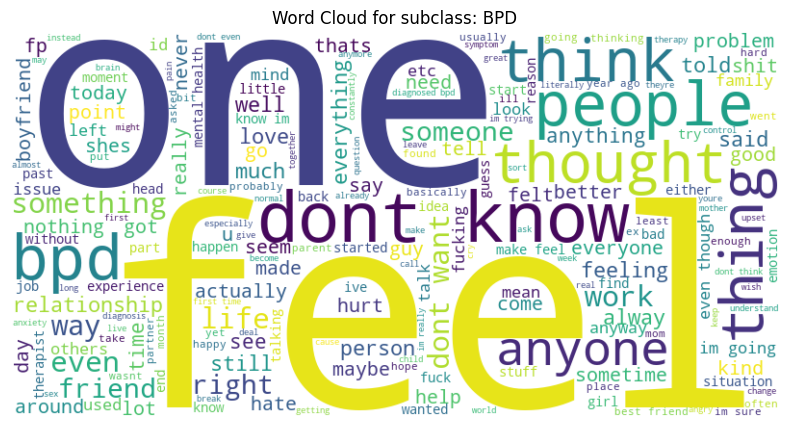

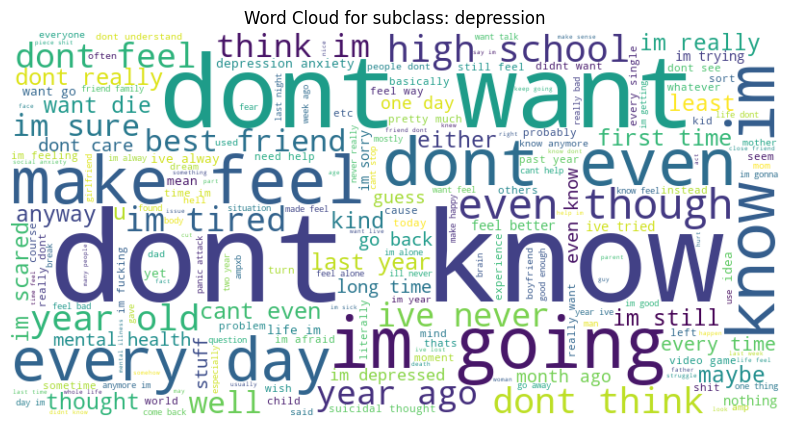

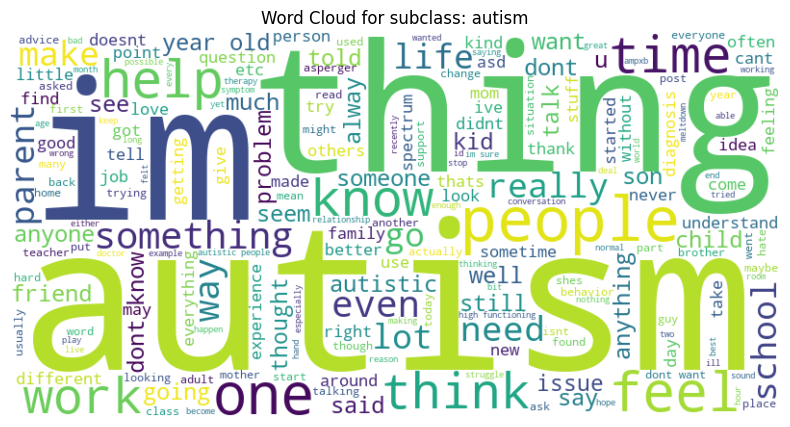

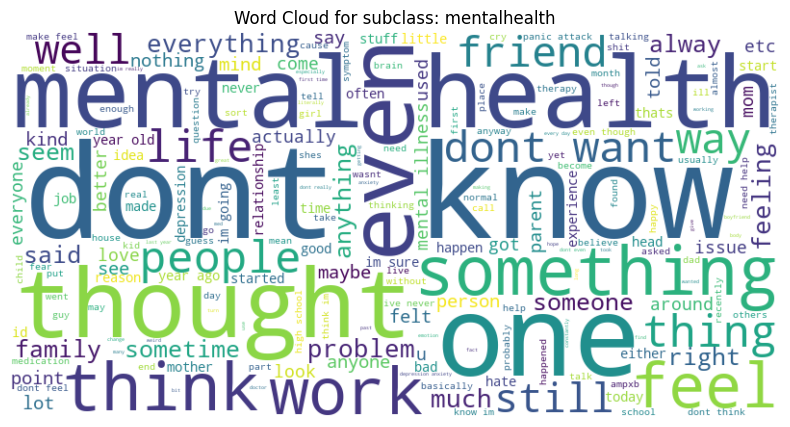

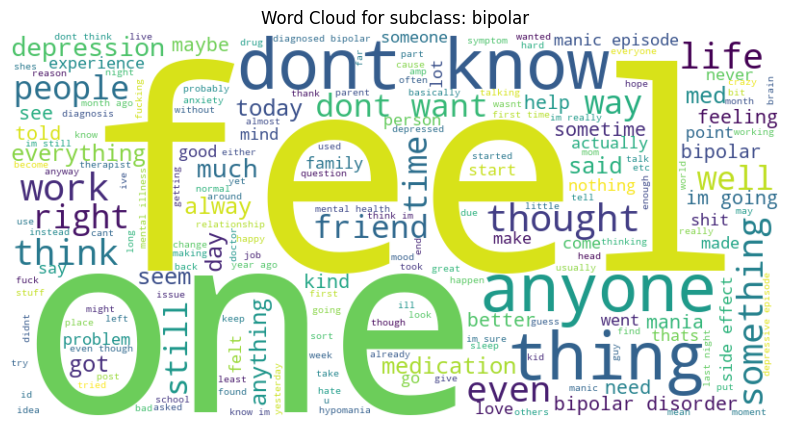

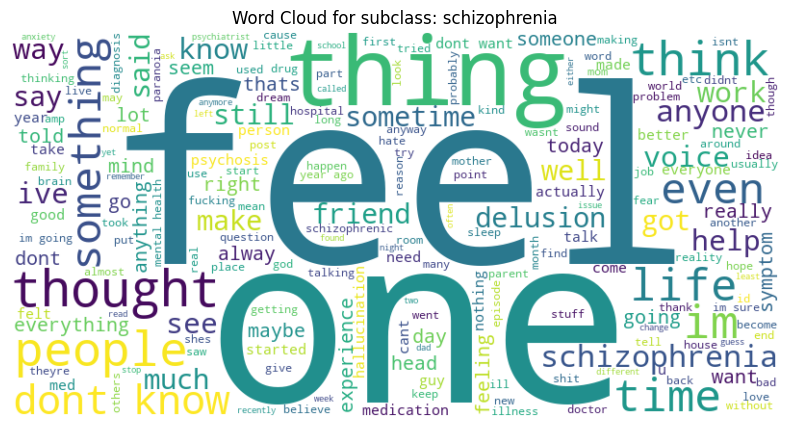

In [103]:
for sub in df['Subreddit'].unique():
    text = ' '.join(df[df['Subreddit'] == sub]['Combined'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for subclass: {sub}')
    plt.show()

In [104]:
import numpy as np

top_words_per_class = defaultdict(list)
vectorizer = CountVectorizer(max_features=1000)
for sub in df['Subreddit'].unique():
    texts = df[df['Subreddit'] == sub]['Combined']
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_class[sub] = sorted_words


In [105]:
top_words_per_class_df = pd.DataFrame({k: dict(v) for k, v in top_words_per_class.items()})
display(top_words_per_class_df)

,Anxiety,BPD,depression,autism,mentalhealth,bipolar,schizophrenia
im,175984.0,77657.0,572321.0,8736.0,91399.0,76890.0,25541.0
anxiety,134971.0,NaN,NaN,NaN,NaN,NaN,NaN
like,108884.0,55336.0,357849.0,6944.0,64663.0,42270.0,17842.0
feel,95581.0,48372.0,347381.0,NaN,55272.0,34966.0,11124.0
get,76372.0,28694.0,215583.0,4726.0,39487.0,26855.0,9677.0
dont,74699.0,39915.0,348088.0,4837.0,53528.0,30728.0,12483.0
ive,70119.0,27623.0,208386.0,NaN,37206.0,30047.0,8927.0
time,65522.0,29001.0,203922.0,3930.0,38434.0,26461.0,9591.0
know,65359.0,35717.0,236562.0,4814.0,43139.0,26539.0,11030.0
really,54580.0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\91938\AppData\Local\Temp\ipykernel_7784\1804911775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['Combined'].str.split().apply(len)


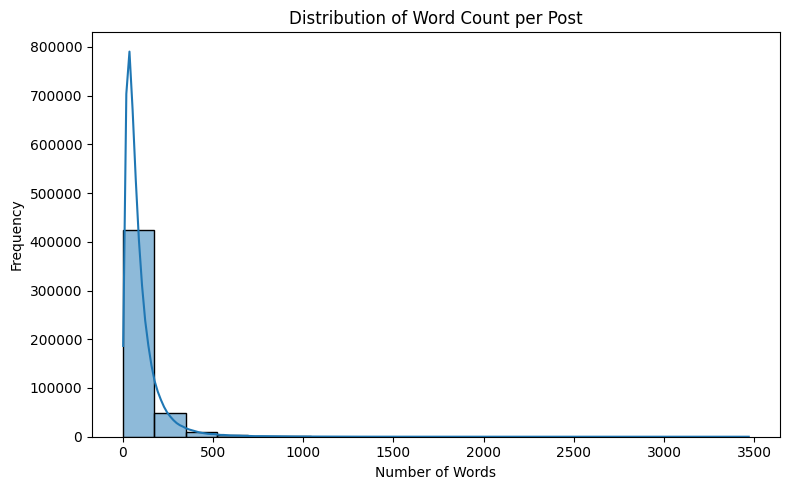

In [106]:
# to check the length of the words 

df['word_count'] = df['Combined'].str.split().apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribution of Word Count per Post')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

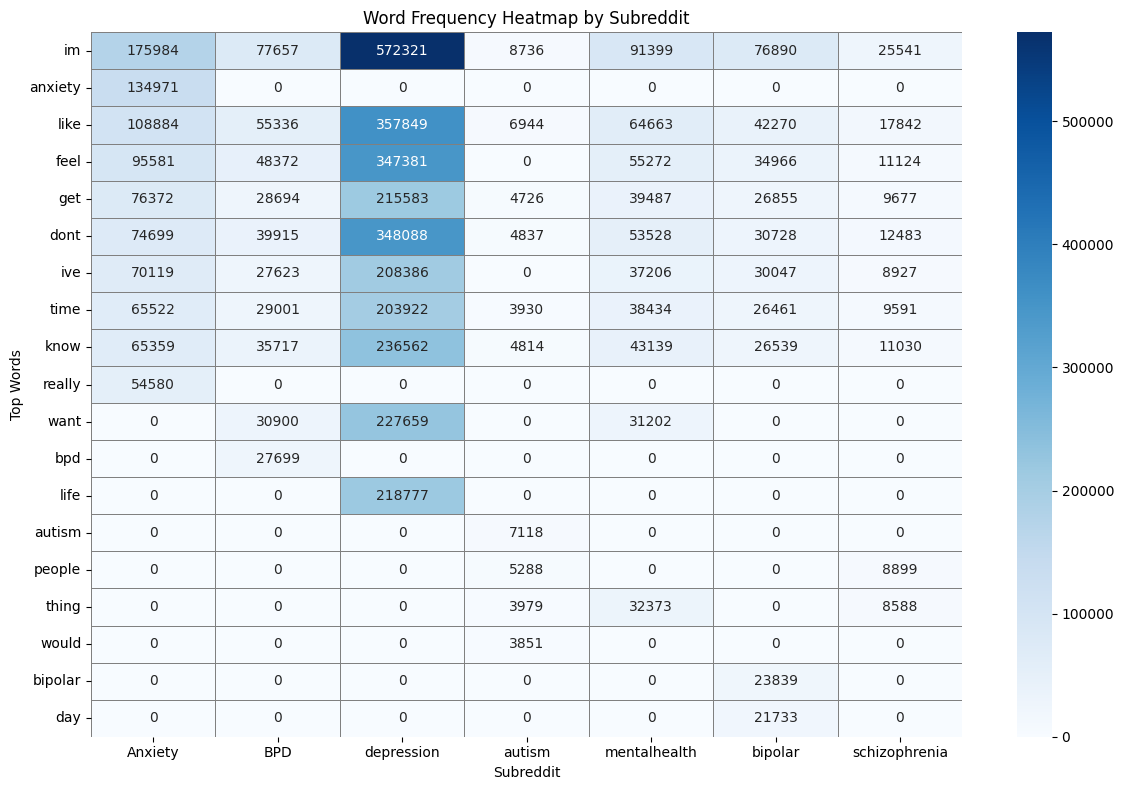

In [107]:
heatmap_df = top_words_per_class_df.fillna(0)

# Set figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_df, 
            annot=True,      # show numbers
            fmt=".0f",       # integer format
            cmap='Blues',    # color scheme
            linewidths=0.5, 
            linecolor='gray')

# Add labels and title
plt.title("Word Frequency Heatmap by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Top Words")
plt.tight_layout()
plt.show()


In [108]:
print(df.columns)  # Check if 'Combined' exists
print(df.head())   # Confirm 'Combined' column content


Index(['Title', 'Text', 'Subreddit', 'Combined', 'word_count'], dtype='object')
                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  \
0  I have struggled with social anxiety from chil...   Anxiety   
1  Back in March (I know, a while ago D:), I woke...   Anxiety   
2  I've been withdrawing from medicines lately (e...   Anxiety   
3  First time poster, long time lurker.   I've ha...   Anxiety   
4  Hi all,  I made a throwaway account as my main...   Anxiety   

                                            Combined  word_count  
0  exposure work struggled social anxiety childho...          47  
1  panic attack derealization cant go doctor advi...

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)


In [110]:
# Drop classes with fewer than 2 samples
min_samples = 2
class_counts = df['Subreddit'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df = df[df['Subreddit'].isin(valid_classes)]

# Recreate features after filtering
X = vectorizer.fit_transform(df['Combined'])
y = df['Subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y.value_counts())

Subreddit
depression       258392
Anxiety           86228
bipolar           41477
mentalhealth      39369
BPD               38191
schizophrenia     17492
autism             7141
Name: count, dtype: int64


In [111]:
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Set Class Distribution:\n", y_test.value_counts(normalize=True))


Train Set Class Distribution:
 Subreddit
depression       0.529176
Anxiety          0.176591
bipolar          0.084944
mentalhealth     0.080626
BPD              0.078214
schizophrenia    0.035824
autism           0.014625
Name: proportion, dtype: float64

Test Set Class Distribution:
 Subreddit
depression       0.529183
Anxiety          0.176596
bipolar          0.084939
mentalhealth     0.080628
BPD              0.078212
schizophrenia    0.035819
autism           0.014622
Name: proportion, dtype: float64


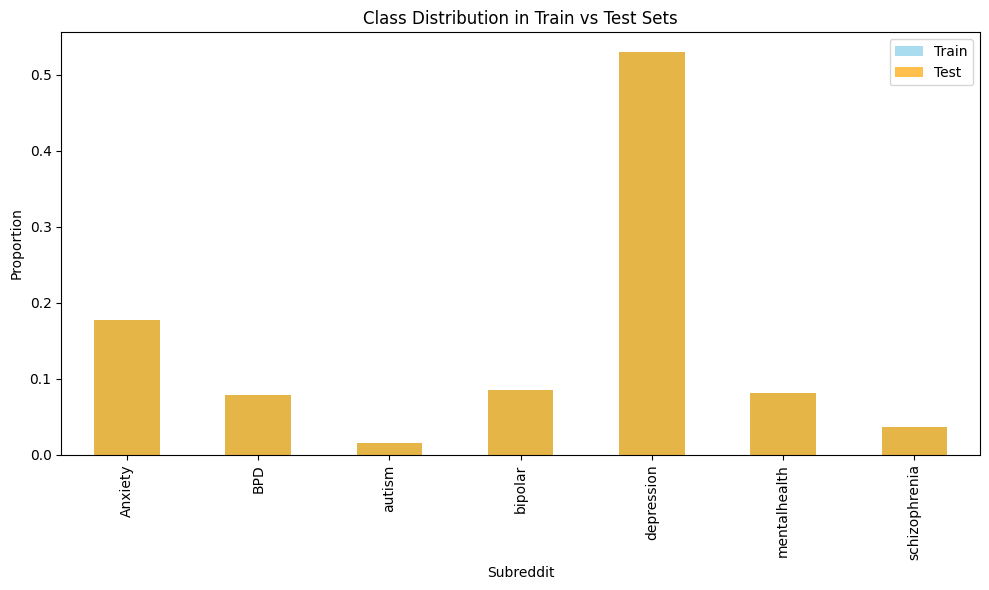

In [112]:
import matplotlib.pyplot as plt

train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
train_dist.plot(kind='bar', alpha=0.7, label='Train', color='skyblue')
test_dist.plot(kind='bar', alpha=0.7, label='Test', color='orange')

plt.title("Class Distribution in Train vs Test Sets")
plt.xlabel("Subreddit")
plt.ylabel("Proportion")
plt.legend()
plt.tight_layout()
plt.show()



In [113]:
# Define valid DSM-5 classes
#valid_classes = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Keep only rows where 'Subreddit' is a valid category
#df = df[df['Subreddit'].isin(valid_classes)].copy()

# Optional sanity check
#print("Remaining categories:", df['Subreddit'].unique())
#print("Total rows after filtering:", len(df))


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Use class weights to handle imbalance
lr_model = LogisticRegression(max_iter=1000,  random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))


               precision    recall  f1-score   support

      Anxiety       0.79      0.75      0.77     17246
          BPD       0.82      0.58      0.68      7638
       autism       0.91      0.68      0.78      1428
      bipolar       0.81      0.61      0.69      8295
   depression       0.78      0.94      0.85     51679
 mentalhealth       0.49      0.25      0.33      7874
schizophrenia       0.71      0.50      0.58      3498

     accuracy                           0.77     97658
    macro avg       0.76      0.61      0.67     97658
 weighted avg       0.76      0.77      0.76     97658



In [115]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


               precision    recall  f1-score   support

      Anxiety       0.74      0.68      0.71     17246
          BPD       0.89      0.38      0.53      7638
       autism       0.89      0.43      0.58      1428
      bipolar       0.79      0.40      0.53      8295
   depression       0.68      0.95      0.79     51679
 mentalhealth       0.31      0.01      0.02      7874
schizophrenia       0.80      0.20      0.32      3498

     accuracy                           0.70     97658
    macro avg       0.73      0.43      0.50     97658
 weighted avg       0.69      0.70      0.65     97658



In [116]:
lr_model = LogisticRegression(max_iter=1000, class_weight = 'balanced', random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))


               precision    recall  f1-score   support

      Anxiety       0.77      0.76      0.76     17246
          BPD       0.55      0.71      0.62      7638
       autism       0.46      0.84      0.60      1428
      bipolar       0.64      0.67      0.65      8295
   depression       0.89      0.70      0.79     51679
 mentalhealth       0.29      0.46      0.36      7874
schizophrenia       0.37      0.71      0.49      3498

     accuracy                           0.69     97658
    macro avg       0.57      0.69      0.61     97658
 weighted avg       0.75      0.69      0.71     97658



In [117]:
# Train with class_weight='balanced'
dt_model = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


               precision    recall  f1-score   support

      Anxiety       0.77      0.57      0.66     17246
          BPD       0.88      0.38      0.53      7638
       autism       0.74      0.64      0.68      1428
      bipolar       0.75      0.41      0.53      8295
   depression       0.67      0.88      0.76     51679
 mentalhealth       0.18      0.11      0.14      7874
schizophrenia       0.53      0.32      0.40      3498

     accuracy                           0.66     97658
    macro avg       0.64      0.48      0.53     97658
 weighted avg       0.66      0.66      0.64     97658



In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,           # number of trees
    max_depth=20,               # control overfitting
    class_weight='balanced',    # handle class imbalance
    random_state=42,
    n_jobs=-1                   # use all C-PU cores
)

rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


               precision    recall  f1-score   support

      Anxiety       0.69      0.74      0.71     17246
          BPD       0.64      0.60      0.62      7638
       autism       0.48      0.80      0.60      1428
      bipolar       0.66      0.65      0.66      8295
   depression       0.84      0.70      0.76     51679
 mentalhealth       0.32      0.24      0.28      7874
schizophrenia       0.20      0.72      0.32      3498

     accuracy                           0.66     97658
    macro avg       0.55      0.64      0.56     97658
 weighted avg       0.71      0.66      0.68     97658



In [120]:
new_texts = ["I feel overwhelmed and anxious all the time."]
new_X = vectorizer.transform(new_texts)
predicted_class = lr_model.predict(new_X)
print(predicted_class[0])


Anxiety


In [121]:
import shap
explainer = shap.LinearExplainer(lr_model, X_train, feature_perturbation="interventional")
hap_values = explainer.shap_values(X_test[:100])


C:\Users\91938\anaconda3\envs\pyspark-env\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [122]:
#shap.summary_plot(
#    shap_values,
#    X_test[:100],
#    feature_names=vectorizer.get_feature_names_out()
#)


In [123]:
!{sys.executable} -m pip install shap --quiet
import shap

In [124]:
# Get label-to-class mapping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Subreddit'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Anxiety': 0, 'BPD': 1, 'autism': 2, 'bipolar': 3, 'depression': 4, 'mentalhealth': 5, 'schizophrenia': 6}


In [125]:
import shap
import matplotlib.pyplot as plt

# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Use predict_proba for shap with logistic regression
explainer = shap.Explainer(lr_model.predict_proba, X_train_dense)
shap_values = explainer(X_test_dense[:100])  # Limiting for speed

# Use vectorizer's feature names
feature_names = vectorizer.get_feature_names_out()

# LabelEncoder to get class names (if needed for class_names param)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['Subreddit'])
class_names = label_encoder.classes_

# Create SHAP summary plot
plt.figure()
shap.summary_plot(
    shap_values,
    X_test_dense[:100],
    feature_names=feature_names,
    class_names=class_names,
    show=False
)

plt.legend(title="Classes", loc='lower right', bbox_to_anchor=(1, 0), frameon=True)
plt.tight_layout()
plt.show()


ValueError: max_evals=500 is too low for the Permutation explainer, it must be at least 2 * num_features + 1 = 4805!

In [ ]:
#!pip install shap --quiet
!{sys.executable} -m pip install shap --quiet
import shap



In [ ]:
# Get label-to-class mapping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Subreddit'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


In [ ]:
import shap
import matplotlib.pyplot as plt

# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Create SHAP explainer and calculate values
explainer = shap.Explainer(dt_model, X_train_dense)
shap_values = explainer(X_test_dense[:100])

# Map class indices to real class names
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['Subreddit'])
class_names = label_encoder.classes_

# Create the plot
plt.figure()
shap.summary_plot(
    shap_values,
    X_test_dense[:100],
    feature_names=vectorizer.get_feature_names_out(),
    class_names=class_names,
    show=False  # Prevent immediate rendering to allow customization
)

# Move legend to bottom right
plt.legend(title="Classes", loc='lower right', bbox_to_anchor=(1, 0), frameon=True)
plt.tight_layout()
plt.show()


In [ ]:
!{sys.executable} -m pip install imodels --quiet
from imodels import RuleFitClassifier
rulefit = RuleFitClassifier()
rulefit.fit(X_train.toarray(), y_train)

from sklearn.metrics import classification_report
y_pred_rulefit = rulefit.predict(X_test.toarray())
print(classification_report(y_test, y_pred_rulefit))
